# Ada Boost

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss, matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost

In [2]:
#input of train data
data = pd.read_csv("trainset_2168.csv")

In [3]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df

,ATSC5d,ATSC4i,SlogP_VSA1,GATS2v,VSA_EState6,ATSC5p,ATSC3v,AATSC0are,ATSC5v,FilterItLogS,...,MATS2Z,GATS2m,AATS2i,AATSC0Z,MATS2i,ATSC3i,VSA_EState6.1,ATSC7Z,ATSC7d,Target
0,-2.728889,-25.325082,14.790515,0.805420,3.984015,-6.612719,398.502575,0.125251,-545.754350,-4.559571,...,0.042195,0.579042,159.995844,28.773333,0.119289,12.574040,-6.861521,-499.031111,3.008889,0
1,-0.013172,-9.509606,0.000000,1.188261,10.457433,0.836143,-244.755691,0.056368,286.027058,-4.072640,...,-0.070246,1.164533,153.088486,6.491990,-0.059652,-3.837482,-8.393922,-92.979708,-7.561410,0
2,-8.746667,19.078029,11.050456,0.943259,5.410910,-2.265468,-543.310893,0.095132,-222.679922,-2.797881,...,0.193372,0.767330,155.950676,7.115556,-0.036548,-13.213895,-7.304433,-204.328889,3.671111,0
3,-7.500000,7.298561,0.000000,1.064240,-1.142632,-2.915553,-899.923918,0.142939,-523.700577,-4.546686,...,0.056348,0.951546,155.401583,7.629378,-0.003948,-23.880483,-17.782129,44.177627,-13.250000,0
4,0.979994,-54.298523,0.000000,0.999246,4.309280,-3.544286,-823.626996,0.053800,-493.778160,-4.851646,...,0.056962,0.963492,148.280834,6.573099,0.093608,-14.915751,-7.269271,-34.333333,2.309326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,-2.785000,-2.962981,5.316789,1.053967,6.411154,-1.169308,-370.566598,0.156703,-331.812834,-1.586460,...,0.104734,0.739404,152.740651,7.700000,-0.248710,1.145958,-3.199700,-63.000000,2.282500,1
2164,-2.207908,-18.038352,0.000000,0.815257,9.328611,2.336778,-490.408818,0.084582,295.652771,-2.133108,...,0.079423,0.916667,158.894061,6.959184,0.277052,-7.050913,-9.365004,-8.285714,0.232143,1
2165,1.102273,-28.881507,5.316789,0.908729,6.506799,-2.353837,-1289.670230,0.152006,-997.066785,-2.253884,...,0.115811,0.909485,153.576879,10.671488,0.044511,-17.510129,-17.513844,123.568182,-2.732955,1
2166,-11.248959,-22.799880,10.633577,1.093079,9.120382,-2.371401,-1110.406849,0.195666,-338.916459,-3.060512,...,0.073244,0.668509,157.460655,10.330887,-0.081357,-3.845589,-16.116821,-25.806784,-7.429875,1


In [4]:
y= df.Target
X=df.drop('Target', axis=1)


In [5]:
cat_features=list(range(0,X.shape[1]))
cat_features


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [6]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

In [7]:
x_train = x_train.T
y_train = y_train.T
x_train
y_train

0       0
1       0
2       0
3       0
4       0
       ..
2163    1
2164    1
2165    1
2166    1
2167    1
Name: Target, Length: 2168, dtype: int64

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# Parameters for AdaBoost
ada_boost = AdaBoostClassifier(
    n_estimators=60,
    learning_rate = 1.2,
    random_state=42
)

# Fit the AdaBoost model
ada_boost.fit(x_train.T, y_train.T)

# Calculate accuracy on the training set
acc_train = ada_boost.score(x_train.T, y_train.T) * 100
print(acc_train)

C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


84.77859778597787


C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

<Figure size 4200x3000 with 0 Axes>

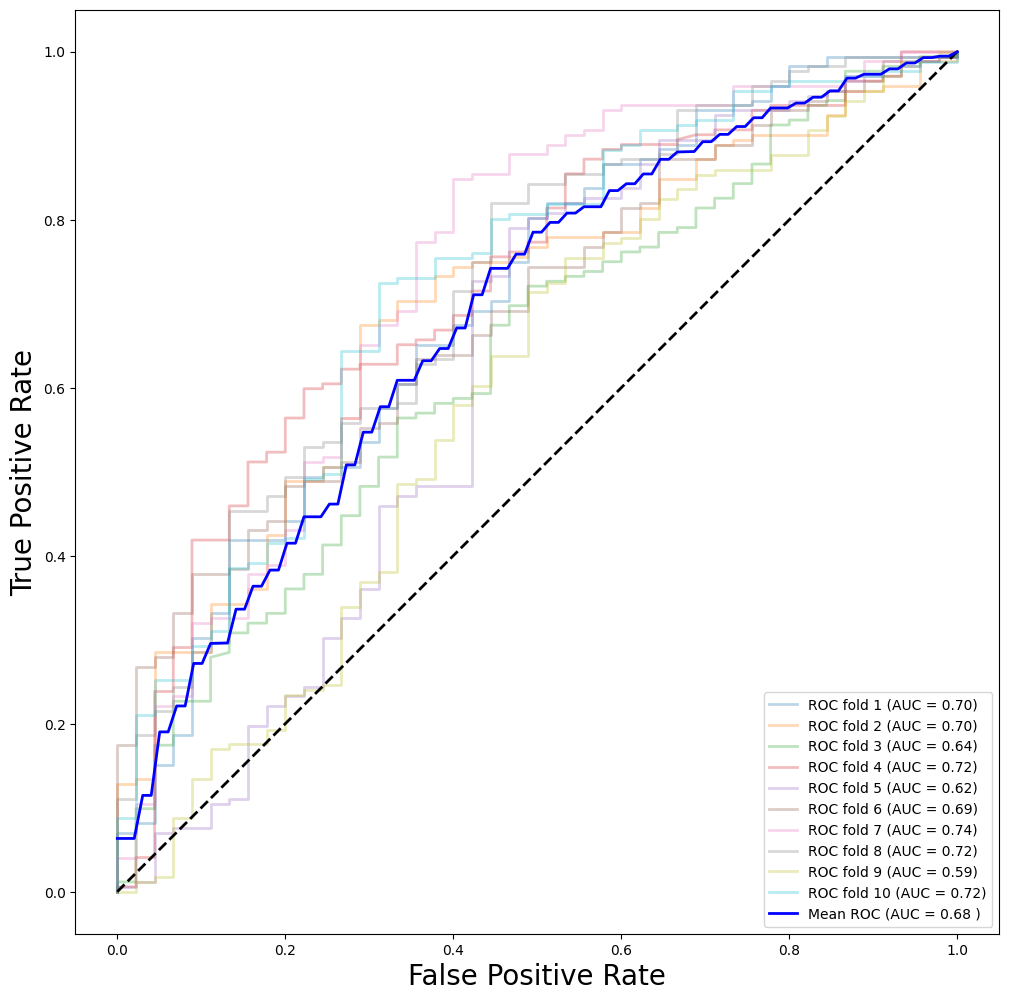

In [45]:
# plot k fold ROC

# 10 fold cross validation of train set
from sklearn.metrics import RocCurveDisplay

from numpy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

plt.figure(figsize=(7, 5), dpi=600)
x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = ada_boost.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.savefig('Adaboost_kfold.png', dpi=600, bbox_inches='tight')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for K-fold cross-validation
num_folds = 10  # You can adjust the number of folds as needed

# Define K-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(ada_boost, x_train, y_train, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation
print("Mean accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))
print("Standard deviation: {:.2f}".format(np.std(cv_scores)))

C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

Cross-validation scores: [0.82949309 0.76497696 0.77419355 0.8156682  0.79723502 0.73271889
 0.79262673 0.82488479 0.7962963  0.75925926]
Mean accuracy: 78.87%
Standard deviation: 0.03


# Test set

In [33]:
#Read the validation Test set
v_test_data = pd.read_csv("testset_480.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(480, 61)

In [34]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)

In [35]:
v_predictions = ada_boost.predict(X_v_test_data)
v_acc_test = ada_boost.score(X_v_test_data, Y_v_test_data)*100
print(v_acc_test)

80.41666666666667


In [36]:
# performance metrics to calculate
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:80.417
Sensitivity:0.885
Specificity:0.400
Balance accuracy:0.643
MCC: 0.288
AUC: 0.643
Brier_loss: 0.196
False Postive rate: 0.600
False Negative rate: 0.115
Precision: 0.881
Recall: 0.885
F1: 0.883
Kappa: 0.288


In [37]:
# confusion matrix
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.41      0.40      0.41        80
           1       0.88      0.89      0.88       400

    accuracy                           0.80       480
   macro avg       0.65      0.64      0.64       480
weighted avg       0.80      0.80      0.80       480



<Axes: xlabel='Predicted Value', ylabel='True Value'>

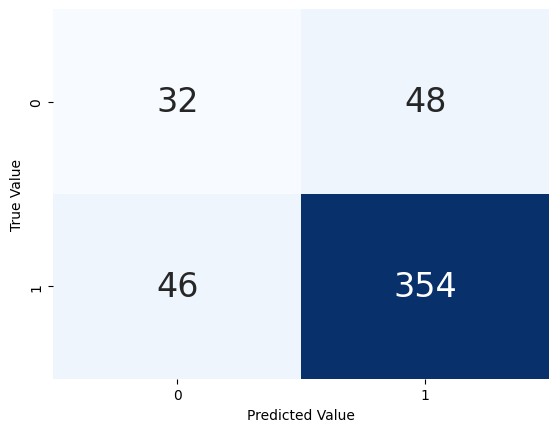

In [38]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [39]:
fig = cf_plt.get_figure()
fig.savefig("Adaboost_Con_mat.png")

In [40]:
m2= ada_boost.predict_proba(X_v_test_data)
m2 = pd.DataFrame(m2)
m2.to_csv("Adaboost_Probabs.csv")

In [53]:
m2_probs = ada_boost.predict_proba(X_v_test_data)

# Convert probabilities to binary predictions
m2_binary = (m2_probs[:, 1] > 0.5).astype(int)

# Create a DataFrame with binary predictions
m2_binary_df = pd.DataFrame(m2_binary, columns=['Predicted_Class'])

# Save to CSV
m2_binary_df.to_csv("Adaboost_Probabs_Binary.csv", index=False)

In [41]:
# ROC - AUC curve 
r_probs = [0 for _ in range(len(Y_v_test_data))]
ada_boost_prob = ada_boost.predict_proba(X_v_test_data)
ada_boost_prob = ada_boost_prob[:,1]

In [42]:
r_auc_score = roc_auc_score(Y_v_test_data, ada_boost_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, ada_boost_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.73328125


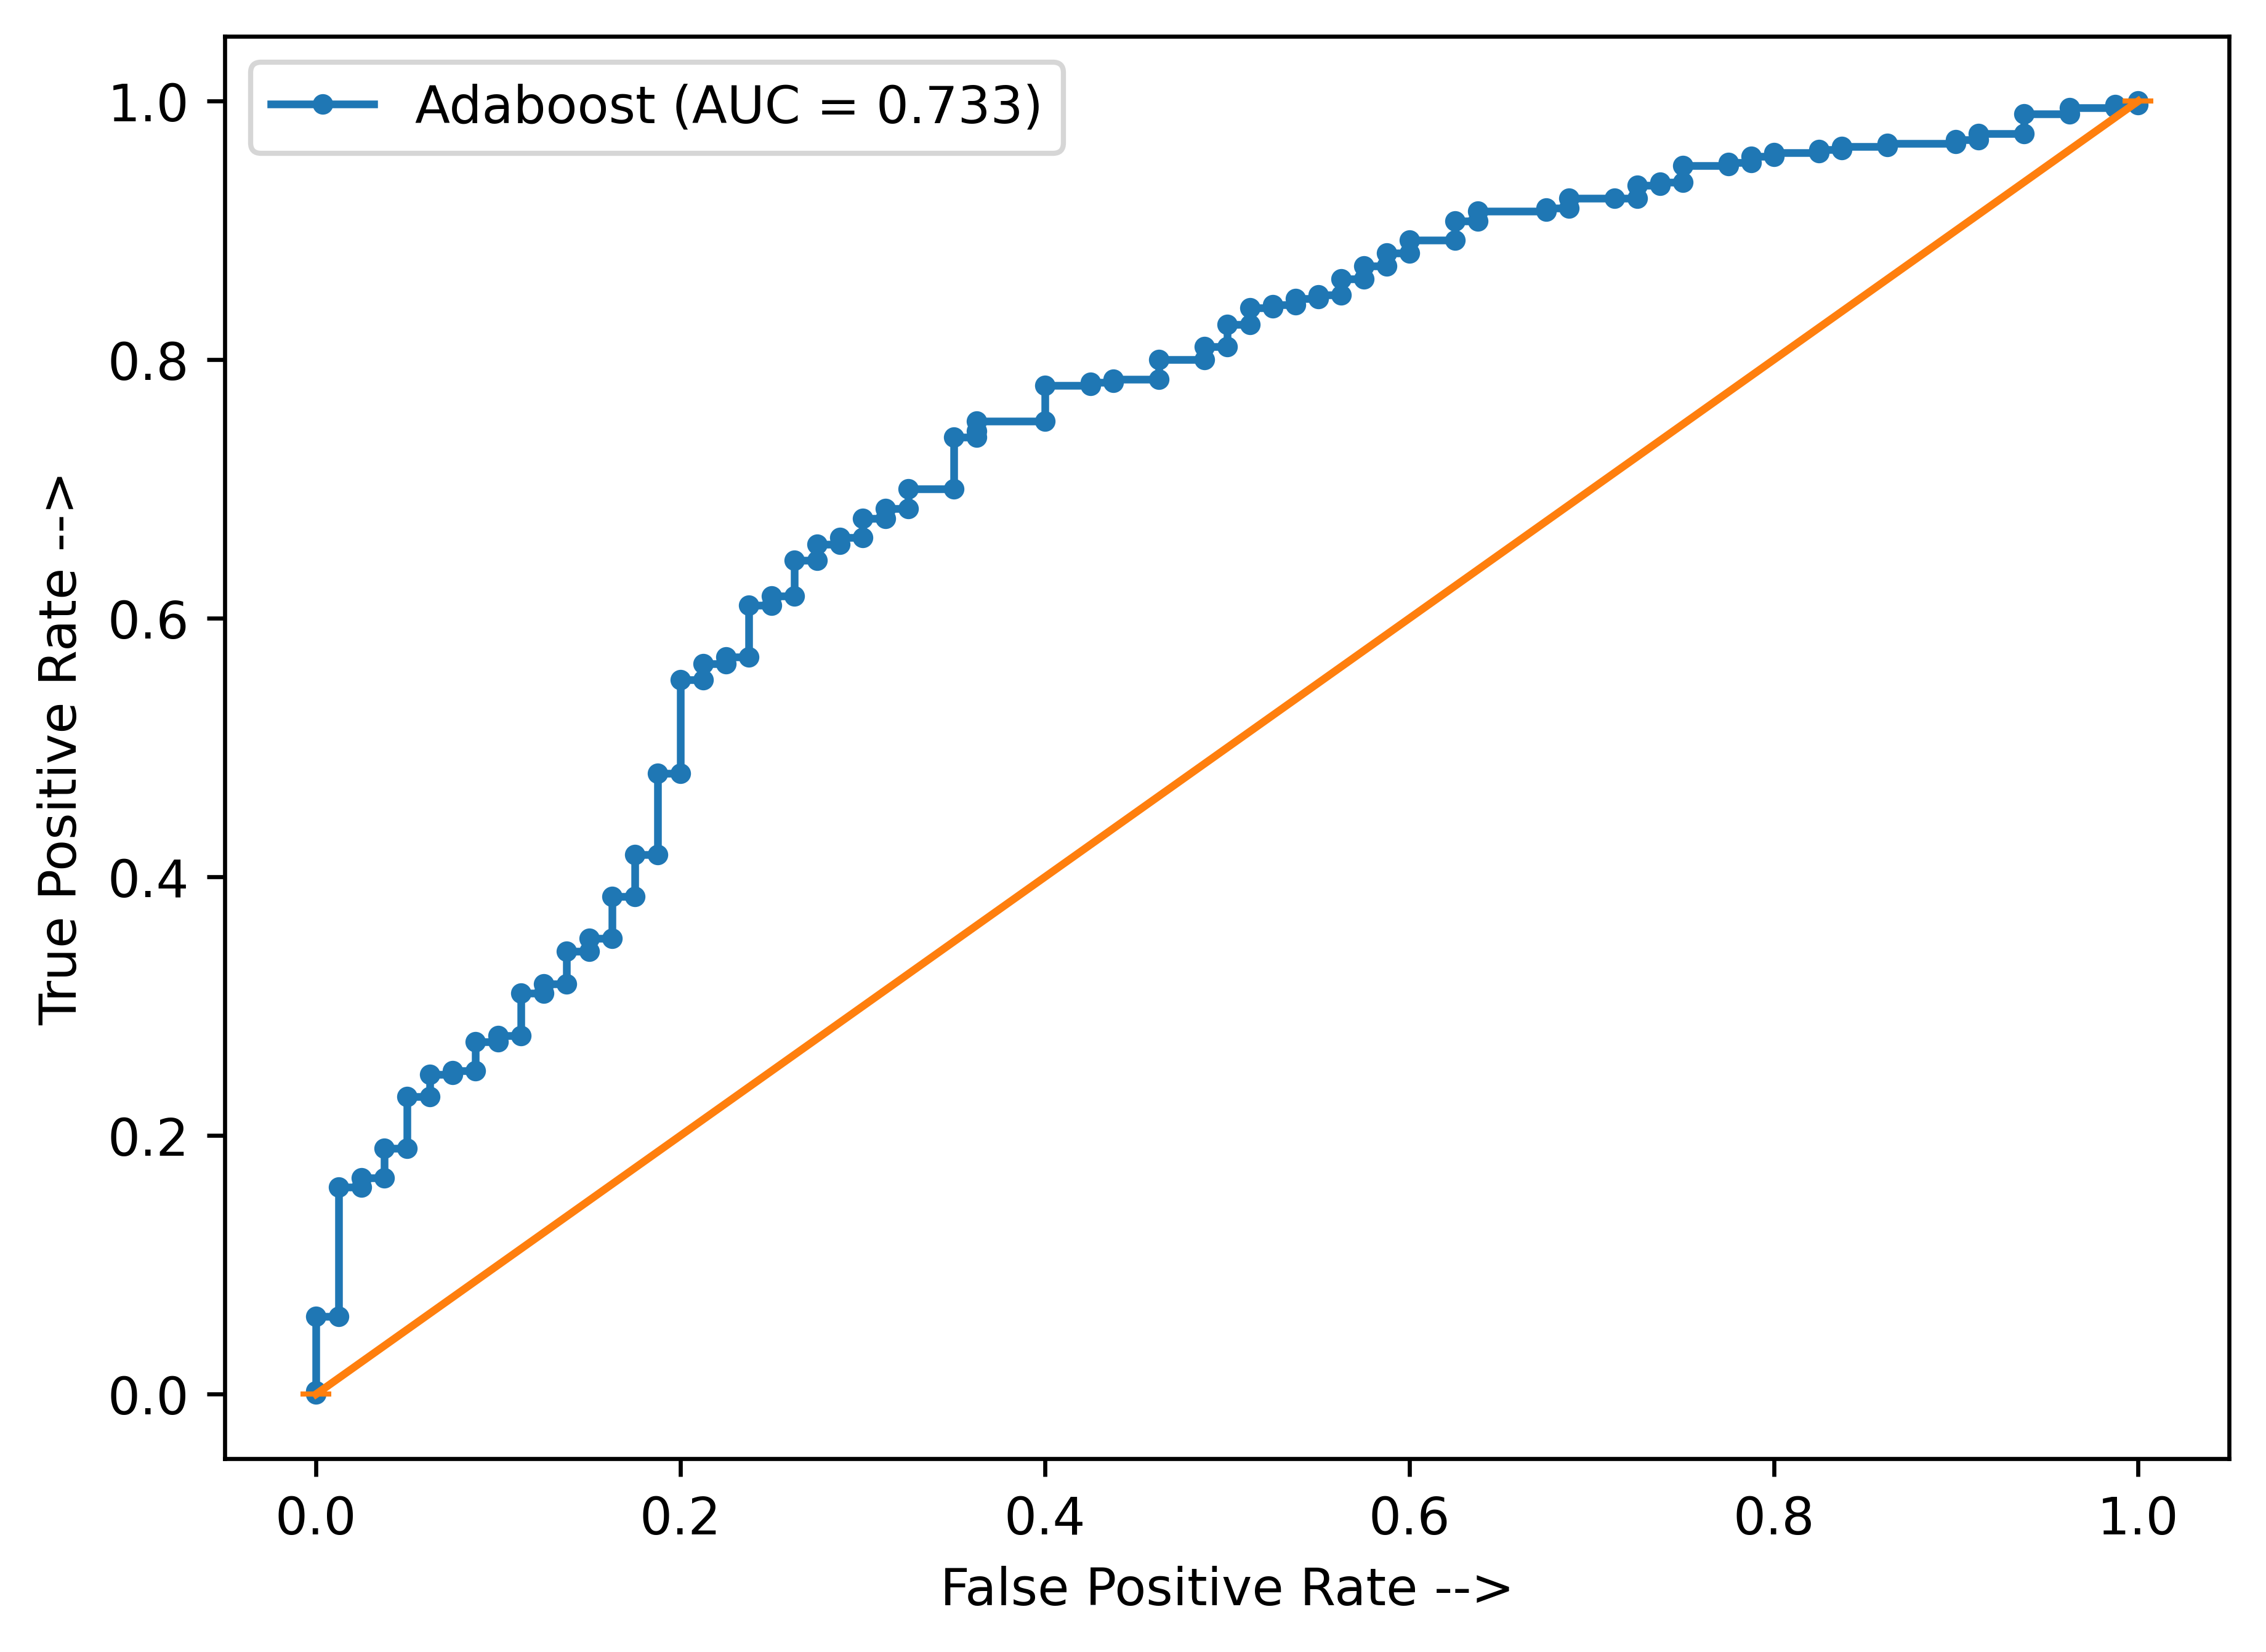

In [43]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='Adaboost (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.savefig('Adaboost_AUC.png', dpi=600, bbox_inches='tight')
plt.show()

PermutationExplainer explainer: 481it [05:33,  1.41it/s]                                                               


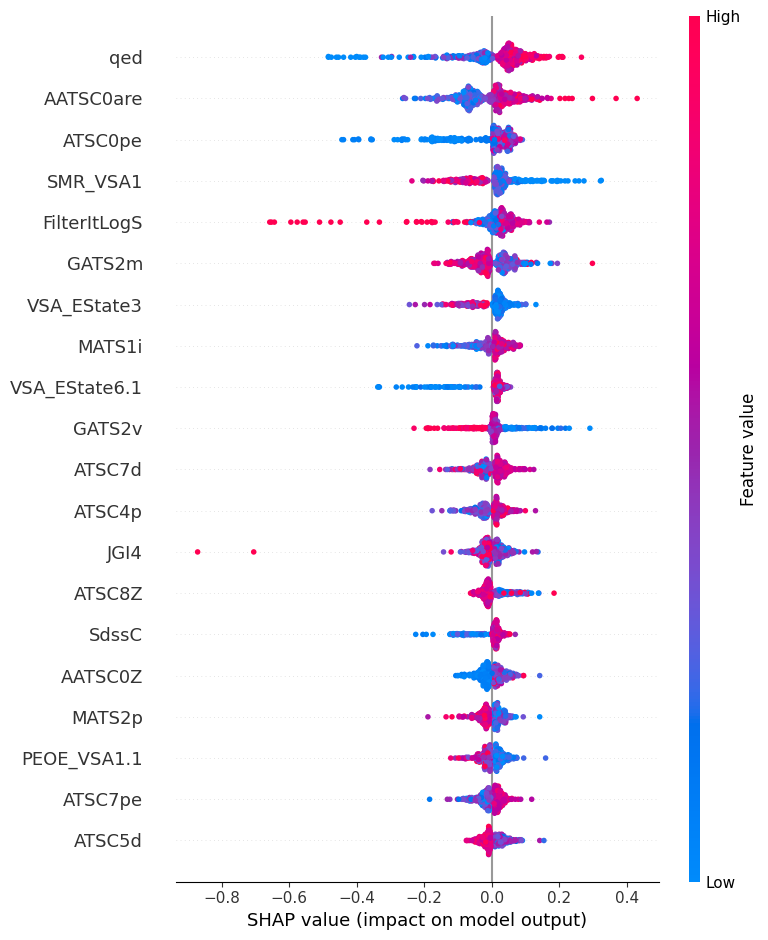

In [46]:
# Explainable AI
import shap

def model_predict(x_train):
    return ada_boost.predict(x_train)

masker = shap.maskers.Independent(X_v_test_data)

explainer = shap.Explainer(model_predict, masker)

shap_values = explainer(X_v_test_data)

shap.summary_plot(shap_values, X_v_test_data, show=False)

In [52]:
import shap
import matplotlib.pyplot as plt

def model_predict(x_train):
    return ada_boost.predict(x_train)

masker = shap.maskers.Independent(X_v_test_data)

explainer = shap.Explainer(model_predict, masker)

shap_values = explainer(X_v_test_data)

# Plot and save the SHAP summary plot
shap.summary_plot(shap_values, X_v_test_data, show=False)

# Save the plot to a file
plt.savefig('Adaboost_shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.close()

PermutationExplainer explainer: 481it [05:33,  1.39it/s]                                                               


In [50]:
# Convert SHAP values to a DataFrame
shap_values_df = pd.DataFrame(shap_values.values, columns=X_v_test_data.columns)

# Save the SHAP values DataFrame to a CSV file
shap_values_df.to_csv('Adaboost_shap_values.csv', index=False)